<a href="https://colab.research.google.com/github/Hirukamunasinghe/gym-pilot-application/blob/main/Train_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/gym/gym.zip

Archive:  /content/drive/MyDrive/gym/gym.zip
   creating: gym/test/
   creating: gym/test/zArmCurlMuchine/
  inflating: gym/test/zArmCurlMuchine/zArmCurlMuchine101_jpg.rf.8c463e534c2e9802df76aa71415f4aa2.jpg  
  inflating: gym/test/zArmCurlMuchine/zArmCurlMuchine107_jpg.rf.7b4d92e17cea112d92182749f78eb933.jpg  
  inflating: gym/test/zArmCurlMuchine/zArmCurlMuchine13_jpg.rf.0ebe964de73de9b651de3451da41e57f.jpg  
  inflating: gym/test/zArmCurlMuchine/zArmCurlMuchine16_jpg.rf.a3fbd38683675f6719fc858cfcd4b160.jpg  
  inflating: gym/test/zArmCurlMuchine/zArmCurlMuchine31_jpg.rf.eb11dc0f85efcb14d06e2e03e9a4d831.jpg  
  inflating: gym/test/zArmCurlMuchine/zArmCurlMuchine33_jpg.rf.121839fb7cbb5c82c7effa7d486caa59.jpg  
  inflating: gym/test/zArmCurlMuchine/zArmCurlMuchine52_jpg.rf.552c871e5bd33545c8e4dfbd594b621f.jpg  
  inflating: gym/test/zArmCurlMuchine/zArmCurlMuchine55_jpg.rf.020303212342fc068e9f3931195f9842.jpg  
  inflating: gym/test/zArmCurlMuchine/zArmCurlMuchine56_jpg.rf.158797342ede

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "gym/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "gym/valid",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "gym/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)


Found 2215 files belonging to 13 classes.
Found 214 files belonging to 13 classes.
Found 158 files belonging to 13 classes.


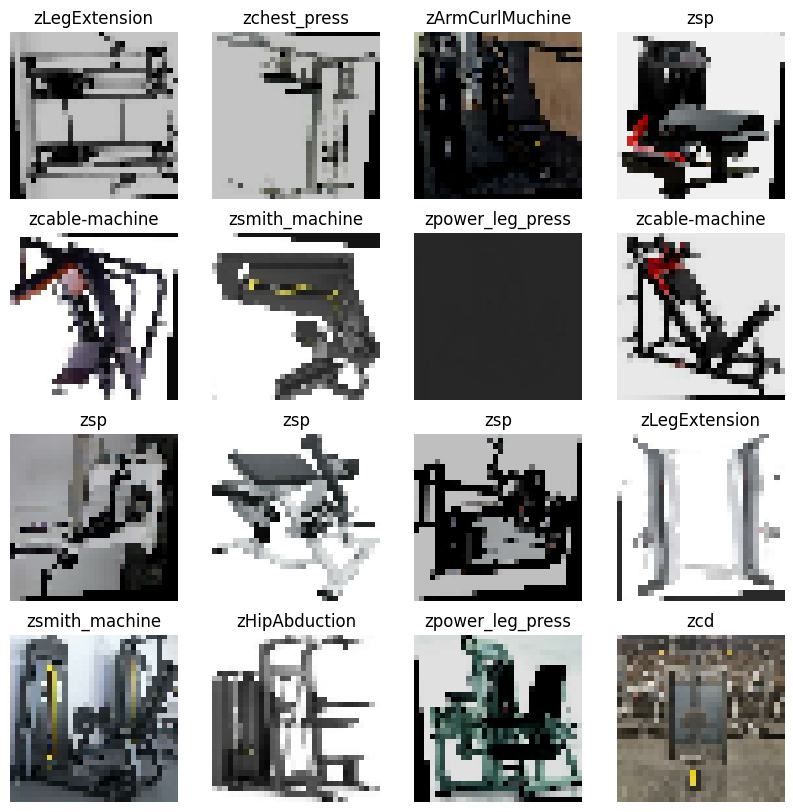

In [ ]:
class_names = ["zsp","zsmith_machine", "zpower_leg_press", "zpd","zLyingLegCurl","zLegExtension","zHipAbduction","zdown","zchest_press","zcd","zcable-machine","zback_extension","zArmCurlMuchine"]

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
plt.show()

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(6)
    ]
)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 80
)

Epoch 1/80
111/111 [==============================] - 10s 49ms/step - loss: nan - accuracy: 0.1034 - val_loss: nan - val_accuracy: 0.0561
Epoch 2/80
111/111 [==============================] - 3s 29ms/step - loss: nan - accuracy: 0.1043 - val_loss: nan - val_accuracy: 0.0561
Epoch 3/80
111/111 [==============================] - 3s 29ms/step - loss: nan - accuracy: 0.1043 - val_loss: nan - val_accuracy: 0.0561
Epoch 4/80
111/111 [==============================] - 5s 40ms/step - loss: nan - accuracy: 0.1043 - val_loss: nan - val_accuracy: 0.0561
Epoch 5/80
111/111 [==============================] - 3s 30ms/step - loss: nan - accuracy: 0.1043 - val_loss: nan - val_accuracy: 0.0561
Epoch 6/80
111/111 [==============================] - 3s 30ms/step - loss: nan - accuracy: 0.1043 - val_loss: nan - val_accuracy: 0.0561
Epoch 7/80
111/111 [==============================] - 5s 44ms/step - loss: nan - accuracy: 0.1043 - val_loss: nan - val_accuracy: 0.0561
Epoch 8/80
111/111 [====================

In [ ]:
model.evaluate(test_ds)

8/8 [==============================] - 0s 25ms/step - loss: nan - accuracy: 0.0886


[nan, 0.08860759437084198]

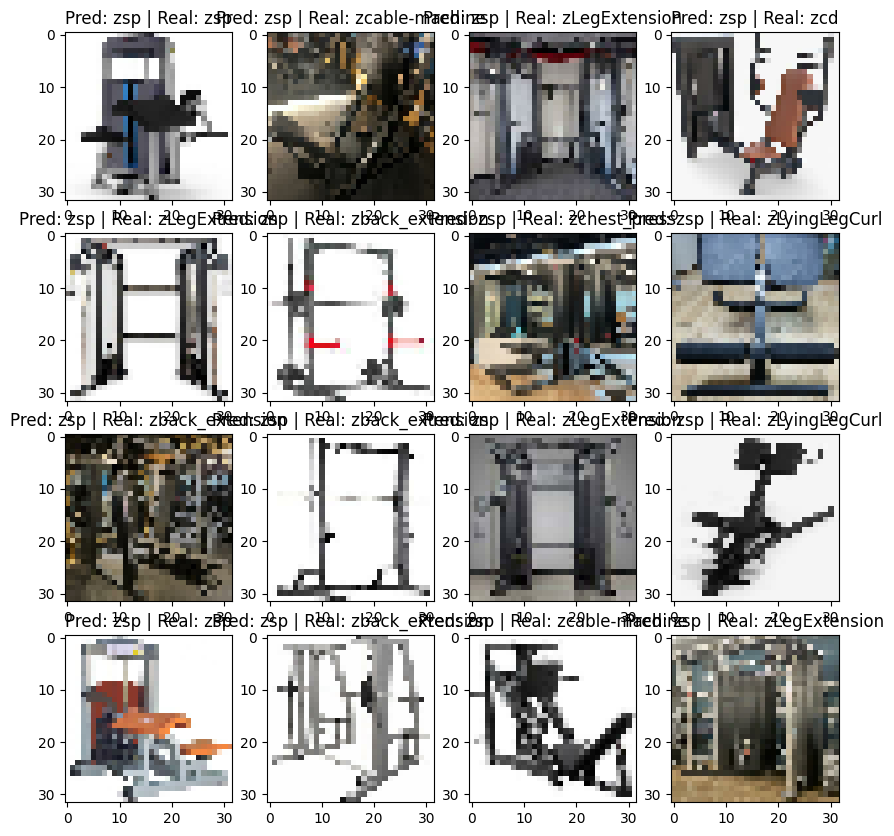

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("gym.tflite", 'wb') as f:
  f.write(tflite_model)